# Preparacion de los datos

In [1]:
from utilities import unpickle, tryDataset, mkfolders, os

(50000, 32, 32, 3)


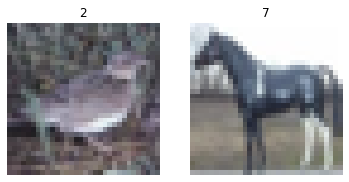

(10000, 32, 32, 3)


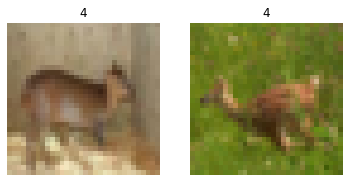

In [2]:
X_train = unpickle("Input\cifar-10-train")
X_test = unpickle("Input\cifar-10-test")
tryDataset(X_train)
tryDataset(X_test)

# Entrenamiento

## Persistencia

In [3]:
_raiz = "Resultados/CIFAR10pruebasAAE"
_nombre = "CIFAR10"

Creamos las carpetas para almacenar el output

In [4]:
mkfolders(_raiz, True)

Carpeta Resultados/CIFAR10pruebasAAE ya existe


## Entrenamiento en grid

In [5]:
from AutoencoderLib import *

Tamaño de la capa latente:

In [6]:
dim_latente_cand = [64, 512, 1024]

Tamaño de las imagenes:

In [7]:
img_shape = X_train["data"][0].shape

Parametros:

In [8]:
discriminators = [(build_discriminator ,"default_disc", {}, {"truth":true_sampler, "truth_kwargs":{}, "falsehood":fake_sampler}),
                    (build_class_discriminator ,"class_disc",{"clases":10}, {"truth":true_sampler_clases, "truth_kwargs":{"nclases":10}, "falsehood":fake_class_sampler})]


ae_losses = [(losses.mean_squared_error, "ae_MSE_loss")]
disc_losses =[(losses.binary_crossentropy, "disc_binXentropy_loss")]

In [9]:
epochs = 12

In [10]:
def mainLoop(model_name="MODEL", enc= build_dense_encoder, dec = build_dense_decoder, fit = fit_AAE_twoPhased):
    for ae_loss in ae_losses:
        for disc in discriminators:
            for disc_loss in disc_losses:
                for dim_latente in dim_latente_cand:
                    ruta = _raiz+"\\"+model_name+"\\"+ae_loss[1]+"\\"+disc[1]+"\\"+disc_loss[1]+"\\"+str(dim_latente)
                    if os.path.isfile(ruta+"/Modelos\\decoder.h5") or os.path.isfile(ruta+"/Modelos\\autoencoder.h5"):
                        print(ruta+" ya ha sido entrenada")
                        show_prevResults(ruta, epochs=epochs)
                        continue
                    mkfolders(ruta, True)
                    ck = {"ae_loss": ae_loss[0], "disc_loss":disc_loss[0]}
                    aae = assemble_AAE(dim_latente, img_shape, enc_model = enc, dec_model = dec, disc_model = disc[0], 
                                    compilation_kwargs=ck, disc_kwargs=disc[2])
                    fit_settings = { "epochs":epochs, "ruta" : ruta}
                    fit_settings.update(disc[3])
                    history = fit(aae=aae, dim_latente=dim_latente, dataset=X_train, **fit_settings)
                    print("Historia del entrenamiento:")
                    plot_history(history, ruta=ruta, title=ruta)
                    (encoder, decoder, _, autoencoder) = aae
                    print("Imagenes regeneradas desde el set de entrenamiento (arriba originales):")
                    clases=0
                    if "clases" in disc[2].keys():
                        clases=disc[2]["clases"]
                    sample_imgs(X_train, autoencoder, epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TRAINSET")
                    print("Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):")
                    sample_imgs(X_test, autoencoder, epoch=epochs, nclases=clases, show=True, ruta=ruta, title=ruta+" regeneration", nombre="TESTSET")
                    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):")
                    exploraLatente(encoder, decoder, "Input\cifar-10-groupedtrain", ruta=ruta, nombre="GenFromLatentTRAINSET")
                    print("Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):")
                    exploraLatente(encoder, decoder, "Input\cifar-10-groupedtest", ruta=ruta, nombre="GenFromLatentTESTSET")
                    mkfolders(ruta+"/Modelos")
                    #decoder.save(ruta+"/Modelos\\decoder.h5")
                    #autoencoder.save(ruta+"/Modelos\\autoencoder.h5")


### Entrenamiento de AAE Convolucional

Carpeta Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\default_disc\disc_binXentropy_loss\64 ya existe
Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\default_disc\disc_binXentropy_loss\64


C:\Users\bitde\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['labels'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


E0 <██████████> 100% DISC: [loss: 0.002488, acc: 100.00%] AAE: [mse: 11.443704, b_ce: 0.041251] 41.58s		
E1 <██████████> 100% DISC: [loss: 0.000226, acc: 100.00%] AAE: [mse: 16.905046, b_ce: 0.041455] 36.59s		
E2 <██████████> 100% DISC: [loss: 0.000001, acc: 100.00%] AAE: [mse: 14.867145, b_ce: 0.035092] 34.93s		
E3 <██████████> 100% DISC: [loss: 0.003979, acc: 100.00%] AAE: [mse: 19.054296, b_ce: 0.039610] 35.09s		
E4 <██████████> 100% DISC: [loss: 0.000001, acc: 100.00%] AAE: [mse: 20.969786, b_ce: 0.036186] 59.82s		
E5 <██████████> 100% DISC: [loss: 0.000000, acc: 100.00%] AAE: [mse: 20.423794, b_ce: 0.037646] 35.07s		
E6 <██████████> 100% DISC: [loss: 0.000020, acc: 100.00%] AAE: [mse: 11.333902, b_ce: 0.036390] 34.67s		
E7 <██████████> 100% DISC: [loss: 0.000003, acc: 100.00%] AAE: [mse: 17.340137, b_ce: 0.046211] 34.49s		
E8 <██████████> 100% DISC: [loss: 0.001006, acc: 100.00%] AAE: [mse: 12.081720, b_ce: 0.033997] 34.42s		
E9 <██████████> 100% DISC: [loss: 0.043611, acc: 99.00%

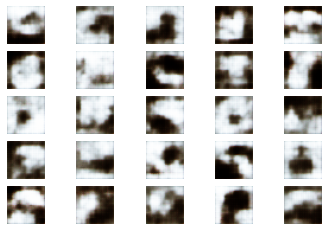

Historia del entrenamiento:


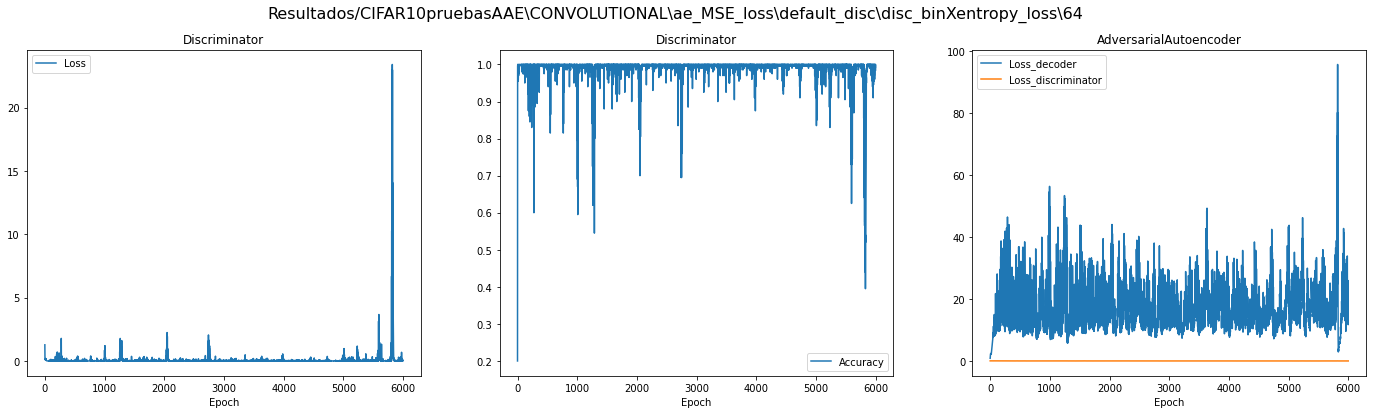

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


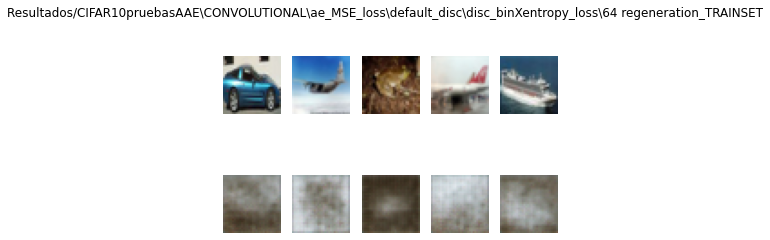

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


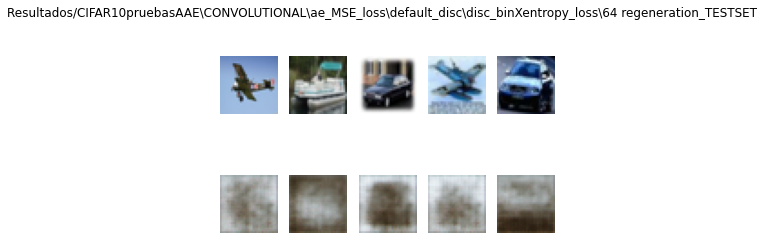

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


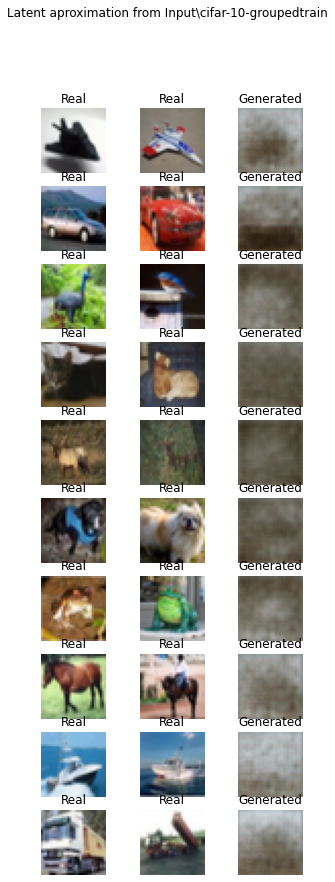

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


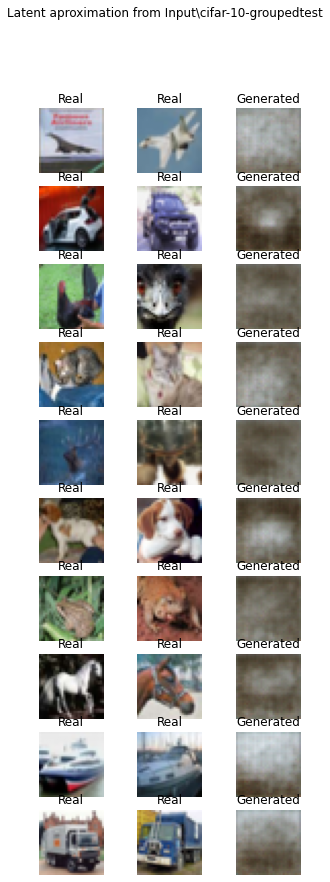

Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\default_disc\disc_binXentropy_loss\512


C:\Users\bitde\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['labels'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


E0 <██████████> 100% DISC: [loss: 0.000086, acc: 100.00%] AAE: [mse: 10.990784, b_ce: 0.045292] 36.96s		
E1 <██████████> 100% DISC: [loss: 0.000102, acc: 100.00%] AAE: [mse: 8.724646, b_ce: 0.036853] 39.50s		
E2 <██████████> 100% DISC: [loss: 0.001207, acc: 100.00%] AAE: [mse: 12.799989, b_ce: 0.040167] 35.19s		
E3 <██████████> 100% DISC: [loss: 0.000032, acc: 100.00%] AAE: [mse: 10.745906, b_ce: 0.036718] 34.97s		
E4 <██████████> 100% DISC: [loss: 0.000040, acc: 100.00%] AAE: [mse: 10.128958, b_ce: 0.037142] 34.14s		
E5 <██████████> 100% DISC: [loss: 0.000692, acc: 100.00%] AAE: [mse: 15.905418, b_ce: 0.041341] 33.77s		
E6 <██████████> 100% DISC: [loss: 0.093994, acc: 99.50%] AAE: [mse: 12.410710, b_ce: 0.032997] 33.43s		
E7 <██████████> 100% DISC: [loss: 0.084928, acc: 99.00%] AAE: [mse: 14.898208, b_ce: 0.029044] 33.67s		
E8 <██████████> 100% DISC: [loss: 0.000002, acc: 100.00%] AAE: [mse: 13.371055, b_ce: 0.032374] 33.80s		
E9 <██████████> 100% DISC: [loss: 0.000025, acc: 100.00%] 

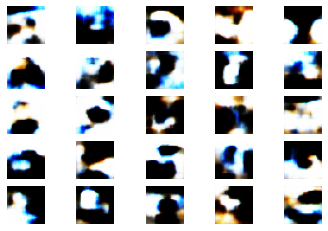

Historia del entrenamiento:


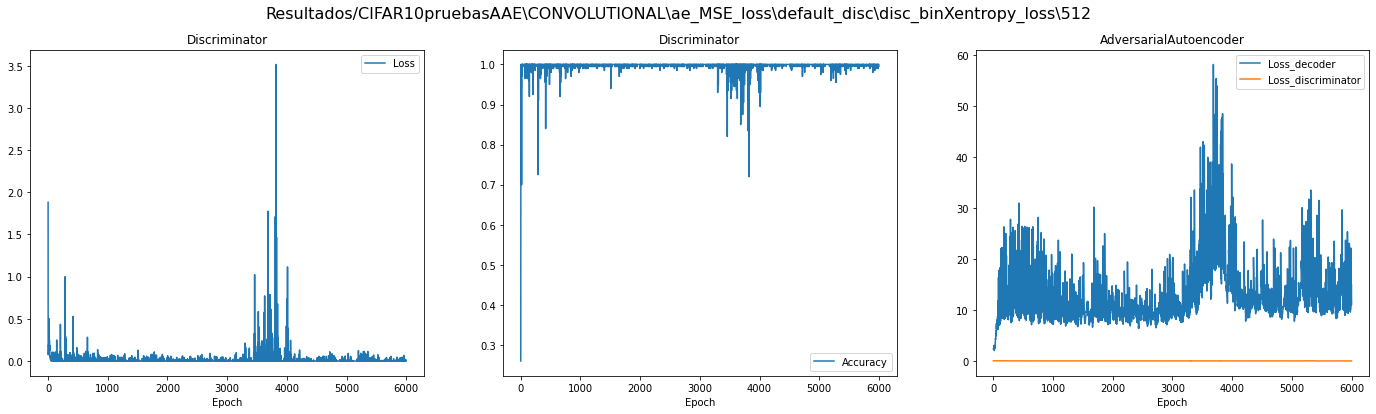

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


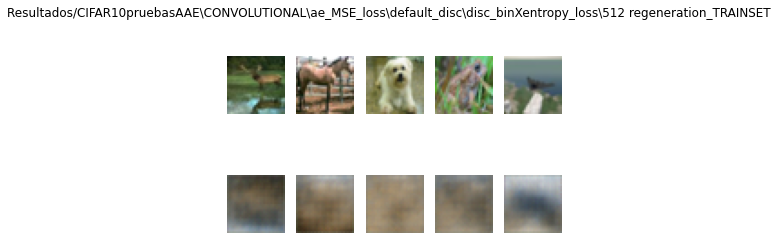

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


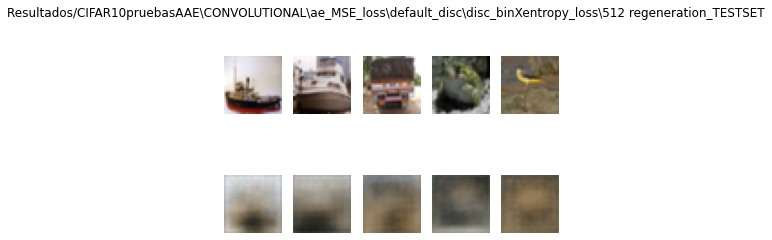

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


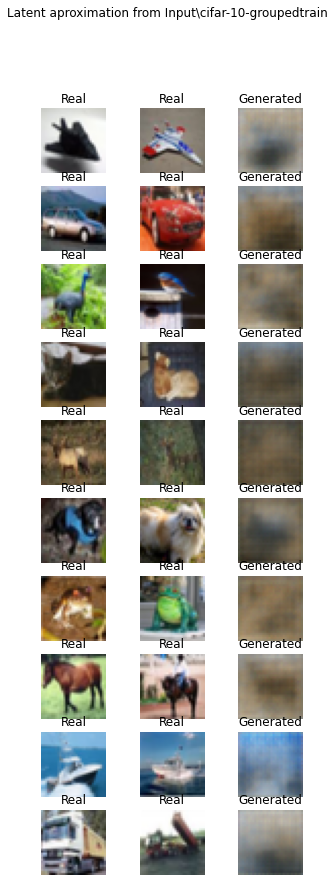

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


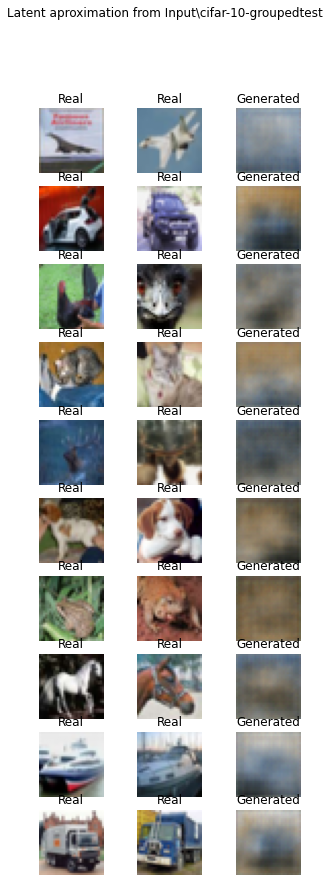

Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\default_disc\disc_binXentropy_loss\1024


C:\Users\bitde\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['labels'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


E0 <██████████> 100% DISC: [loss: 0.002680, acc: 100.00%] AAE: [mse: 14.845450, b_ce: 0.031301] 36.33s		
E1 <██████████> 100% DISC: [loss: 0.069621, acc: 99.50%] AAE: [mse: 18.476917, b_ce: 0.036861] 35.20s		
E2 <██████████> 100% DISC: [loss: 0.025894, acc: 99.50%] AAE: [mse: 9.365455, b_ce: 0.045948] 34.75s			
E3 <██████████> 100% DISC: [loss: 0.000009, acc: 100.00%] AAE: [mse: 12.241696, b_ce: 0.038175] 34.79s		
E4 <██████████> 100% DISC: [loss: 0.000023, acc: 100.00%] AAE: [mse: 10.279832, b_ce: 0.035512] 34.90s		
E5 <██████████> 100% DISC: [loss: 0.117236, acc: 96.00%] AAE: [mse: 31.065374, b_ce: 0.066264] 34.77s		
E6 <██████████> 100% DISC: [loss: 0.000000, acc: 100.00%] AAE: [mse: 18.308043, b_ce: 0.037224] 34.80s		
E7 <██████████> 100% DISC: [loss: 0.001357, acc: 100.00%] AAE: [mse: 10.992908, b_ce: 0.050193] 34.92s		
E8 <██████████> 100% DISC: [loss: 0.000049, acc: 100.00%] AAE: [mse: 13.536313, b_ce: 0.035743] 34.70s		
E9 <██████████> 100% DISC: [loss: 0.008197, acc: 99.50%] A

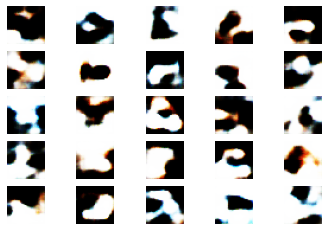

Historia del entrenamiento:


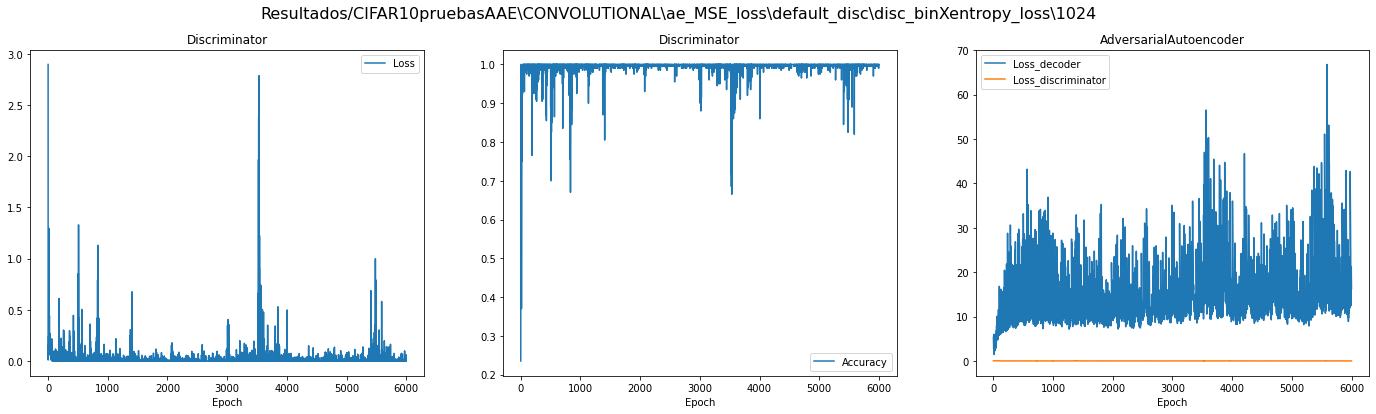

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


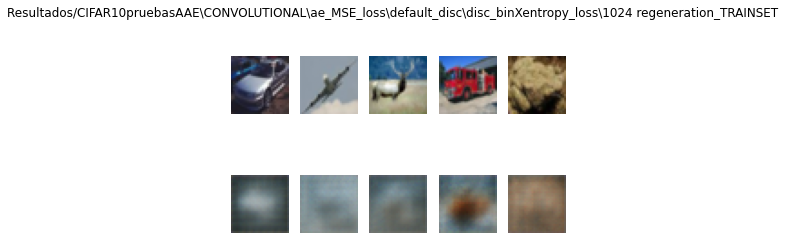

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


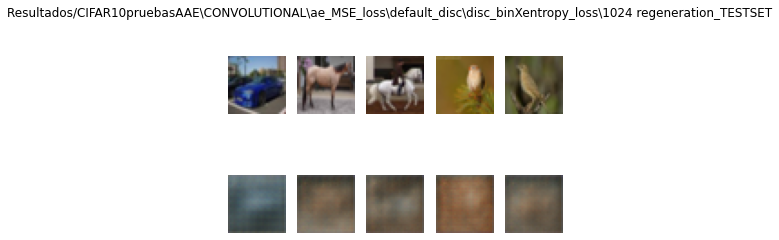

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


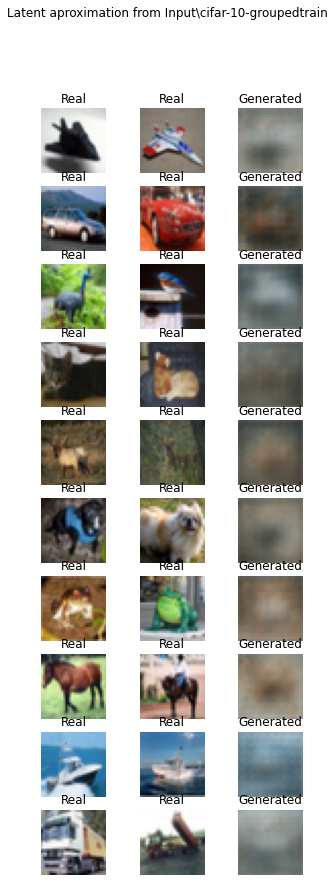

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


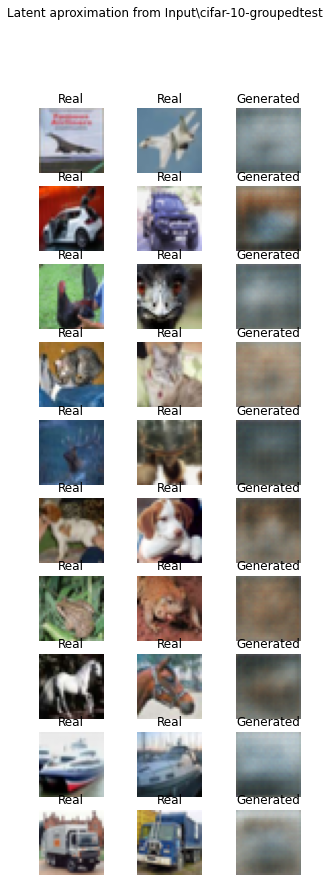

Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\class_disc\disc_binXentropy_loss\64
E0 <██████████> 100% DISC: [loss: 0.282768, acc: 89.00%] AAE: [mse: 3.391122, b_ce: 0.034774] 49.15s		
E1 <██████████> 100% DISC: [loss: 0.310574, acc: 86.00%] AAE: [mse: 5.099095, b_ce: 0.031213] 48.13s		
E2 <██████████> 100% DISC: [loss: 0.411670, acc: 66.50%] AAE: [mse: 6.294387, b_ce: 0.029693] 47.82s		
E3 <██████████> 100% DISC: [loss: 0.254334, acc: 87.50%] AAE: [mse: 6.395817, b_ce: 0.029973] 47.64s		
E4 <██████████> 100% DISC: [loss: 0.227554, acc: 90.00%] AAE: [mse: 7.482253, b_ce: 0.028672] 47.53s		
E5 <██████████> 100% DISC: [loss: 0.329828, acc: 87.50%] AAE: [mse: 9.910909, b_ce: 0.032077] 47.57s		
E6 <██████████> 100% DISC: [loss: 0.265524, acc: 87.50%] AAE: [mse: 9.474857, b_ce: 0.034373] 47.54s		
E7 <██████████> 100% DISC: [loss: 0.246605, acc: 90.50%] AAE: [mse: 11.196429, b_ce: 0.030192] 47.65s		
E8 <██████████> 100% DISC: [loss: 0.475715, acc: 72.50%] AAE: [mse: 12.0

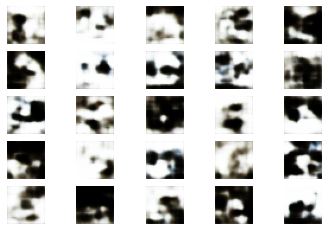

Historia del entrenamiento:


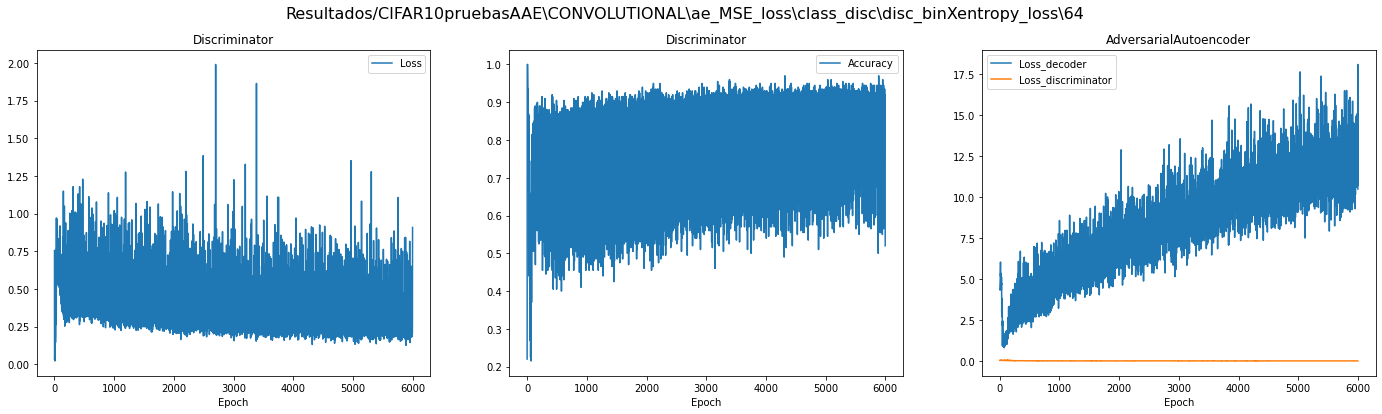

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


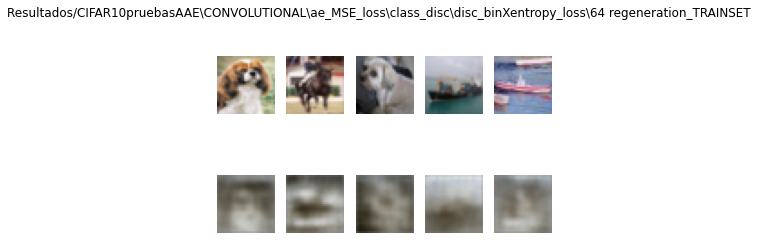

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


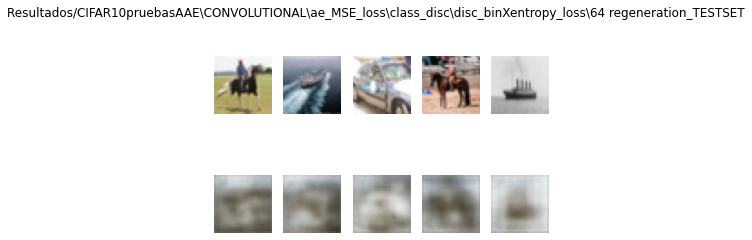

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


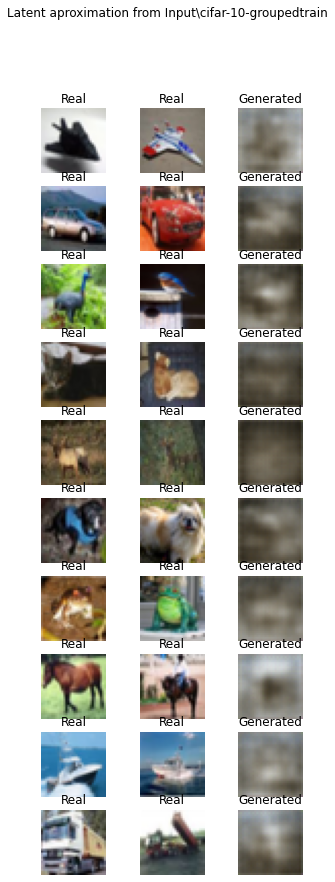

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


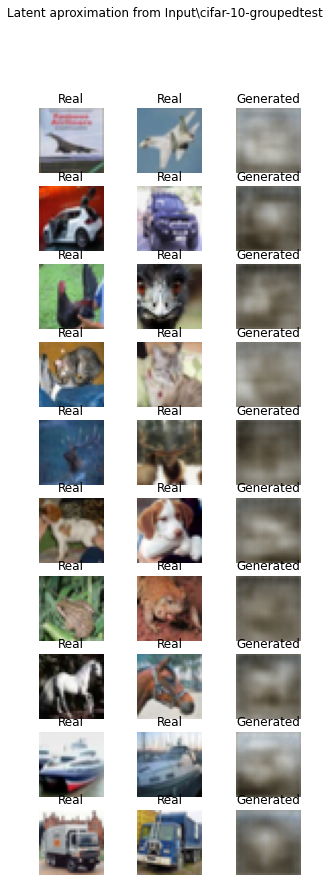

Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\class_disc\disc_binXentropy_loss\512
E0 <██████████> 100% DISC: [loss: 0.649188, acc: 48.00%] AAE: [mse: 0.745099, b_ce: 0.023326] 49.83s		
E1 <██████████> 100% DISC: [loss: 0.554350, acc: 59.00%] AAE: [mse: 1.239635, b_ce: 0.019823] 48.71s		
E2 <██████████> 100% DISC: [loss: 0.583572, acc: 62.50%] AAE: [mse: 1.717836, b_ce: 0.019030] 49.69s		
E3 <██████████> 100% DISC: [loss: 0.667005, acc: 40.50%] AAE: [mse: 1.805919, b_ce: 0.018579] 50.74s		
E4 <██████████> 100% DISC: [loss: 0.479031, acc: 60.50%] AAE: [mse: 2.225275, b_ce: 0.015231] 50.35s		
E5 <██████████> 100% DISC: [loss: 0.423354, acc: 76.00%] AAE: [mse: 2.490826, b_ce: 0.016802] 50.09s		
E6 <██████████> 100% DISC: [loss: 0.379421, acc: 80.50%] AAE: [mse: 3.107213, b_ce: 0.016882] 50.52s		
E7 <██████████> 100% DISC: [loss: 0.374088, acc: 77.50%] AAE: [mse: 3.501238, b_ce: 0.015397] 49.58s		
E8 <██████████> 100% DISC: [loss: 0.493656, acc: 61.00%] AAE: [mse: 2.68

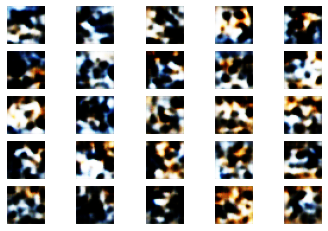

Historia del entrenamiento:


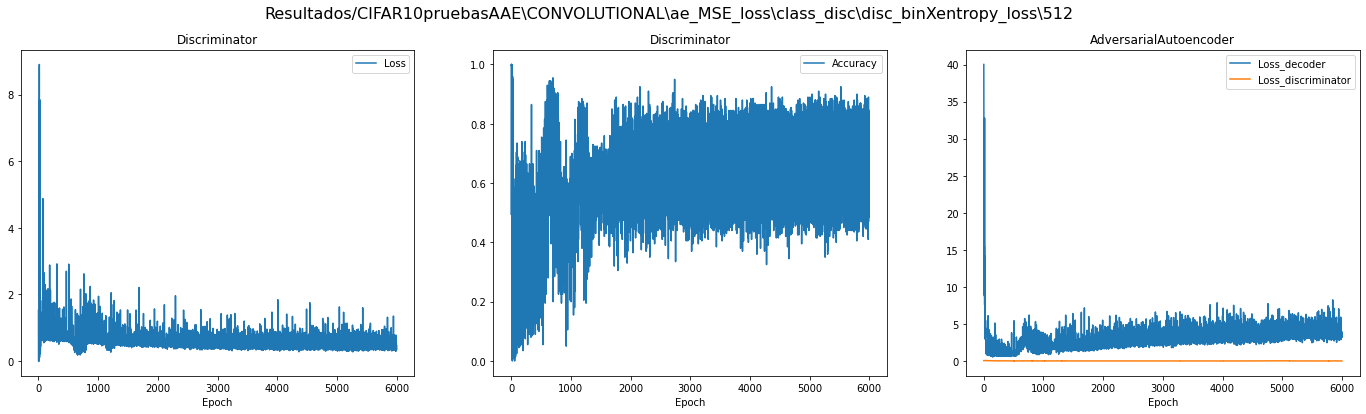

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


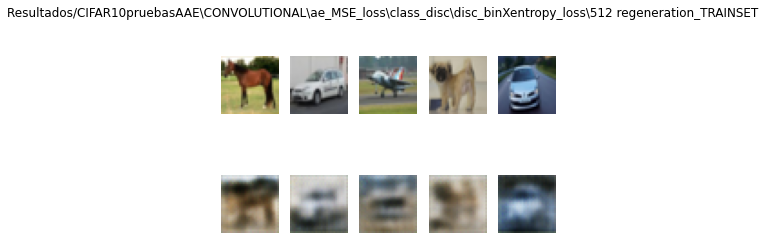

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


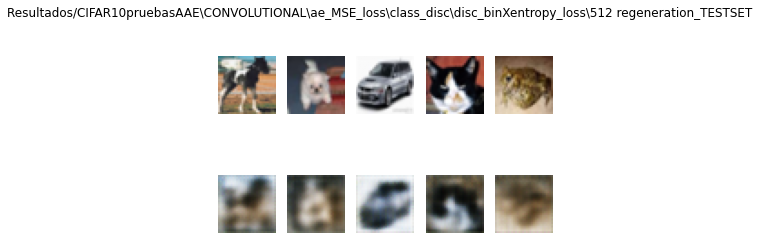

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


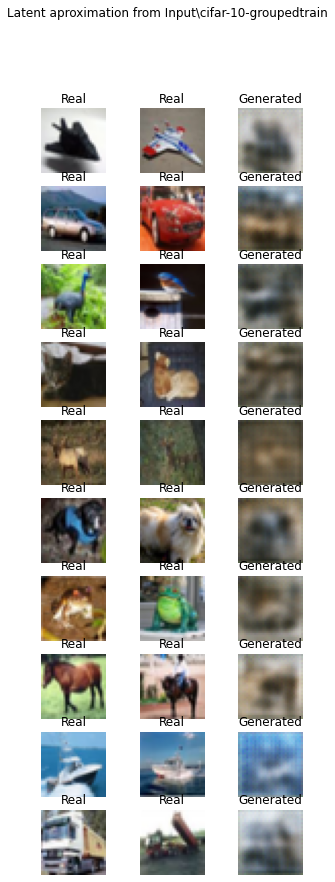

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


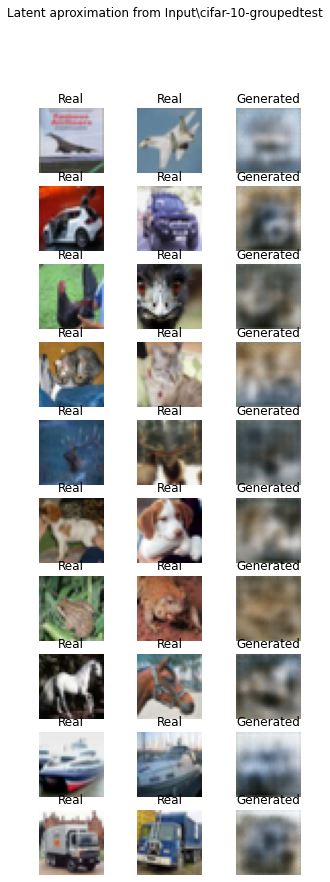

Entrenando: Resultados/CIFAR10pruebasAAE\CONVOLUTIONAL\ae_MSE_loss\class_disc\disc_binXentropy_loss\1024
E0 <██████████> 100% DISC: [loss: 0.414679, acc: 80.50%] AAE: [mse: 3.125216, b_ce: 0.029875] 53.25s		
E1 <██████████> 100% DISC: [loss: 0.709494, acc: 31.50%] AAE: [mse: 0.943529, b_ce: 0.022853] 51.86s		
E2 <██████████> 100% DISC: [loss: 0.633104, acc: 63.50%] AAE: [mse: 0.972928, b_ce: 0.019561] 49.55s		
E3 <██████████> 100% DISC: [loss: 0.655592, acc: 67.00%] AAE: [mse: 0.907750, b_ce: 0.016961] 51.06s		
E4 <██████████> 100% DISC: [loss: 0.493627, acc: 80.00%] AAE: [mse: 1.352490, b_ce: 0.016184] 51.26s		
E5 <██████████> 100% DISC: [loss: 0.493719, acc: 61.00%] AAE: [mse: 1.639748, b_ce: 0.018858] 50.62s		
E6 <██████████> 100% DISC: [loss: 0.720365, acc: 44.00%] AAE: [mse: 1.764688, b_ce: 0.020869] 50.98s		
E7 <██████████> 100% DISC: [loss: 0.427343, acc: 76.00%] AAE: [mse: 2.178601, b_ce: 0.018648] 49.80s		
E8 <██████████> 100% DISC: [loss: 0.442821, acc: 74.00%] AAE: [mse: 2.1

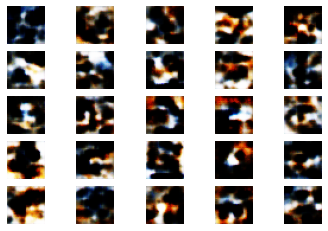

Historia del entrenamiento:


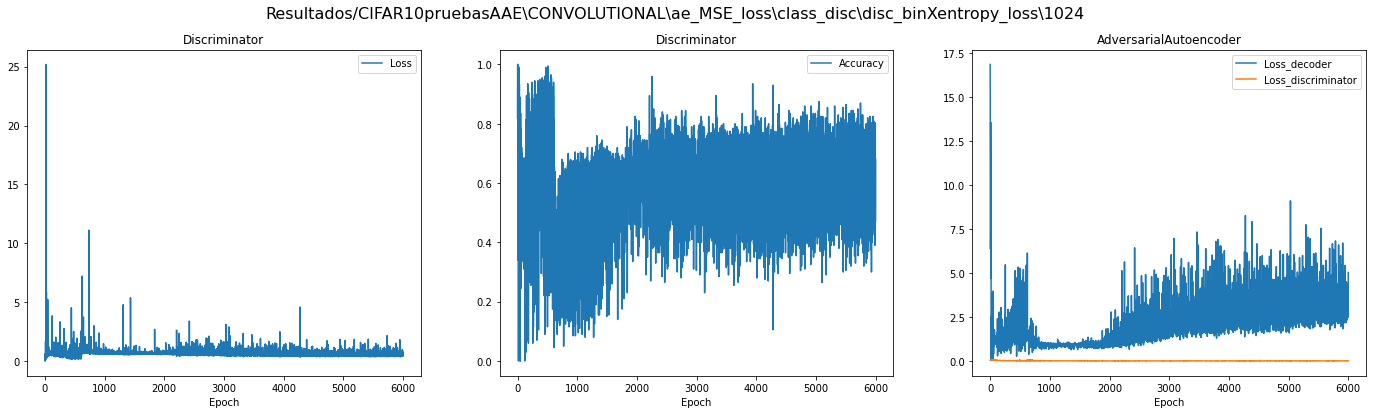

Imagenes regeneradas desde el set de entrenamiento (arriba originales):


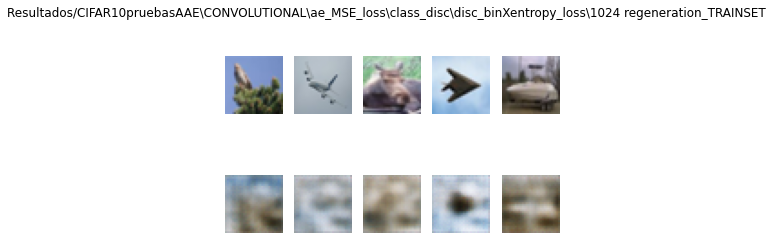

Imagenes regeneradas desde imagenes nunca vistas por la red (arriba originales):


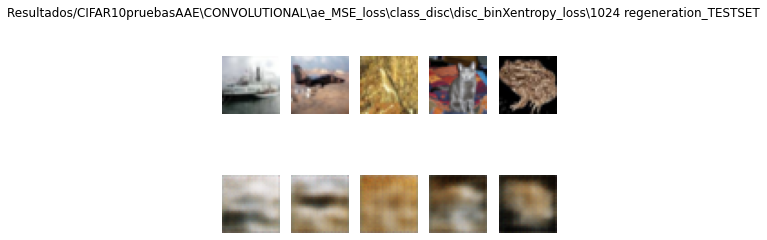

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Train):


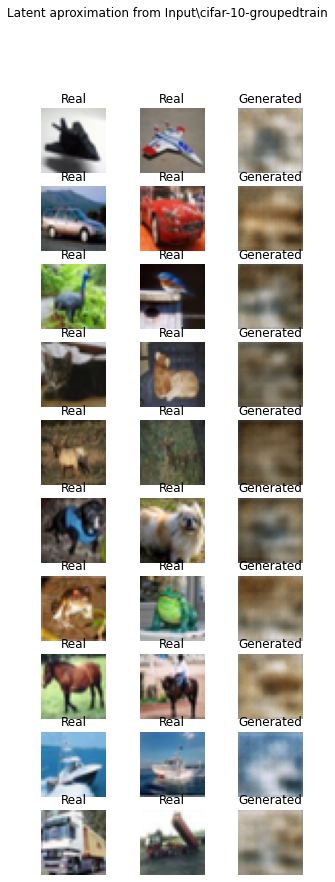

Imagenes generadas desde una aproximacion a coordenadas del espacio latente (Test):


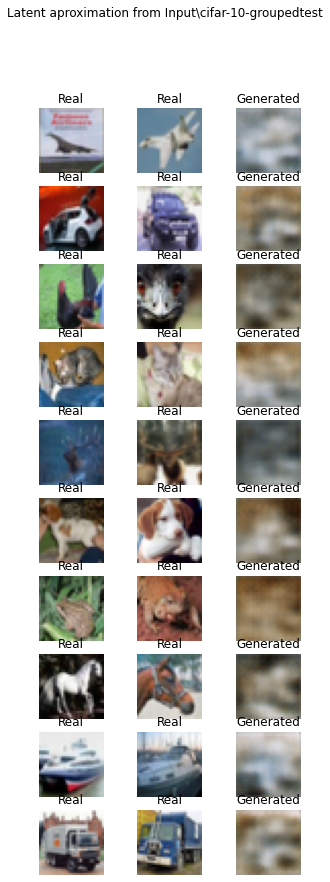

In [12]:
model_name = "CONVOLUTIONAL"

encoder = build_conv_encoder
decoder = build_conv_decoder

mainLoop(enc=encoder, dec=decoder, model_name=model_name)
